### Alguns conceitos sobre Python


Operadores * e **

In [1]:
# O operador * captura os valores restantes ao desempacotar uma lista/tupla
vals = [1, 2, 3, 4]
a, b, *c = vals
c

[3, 4]

In [2]:
# O mesmo vale para a criação de uma nova lista/tupla
a = 1
b = [2, 3, 4]
vals = [a, *b]
vals

[1, 2, 3, 4]

In [3]:
# O operador * pode ser usado nos arguentos de uma função. A função aceitará
# um número variado de argumentos
def func(*shape, val):
    print(shape, type(shape))

func(1, 2, 3, val=5)

(1, 2, 3) <class 'tuple'>


In [4]:
# O operador ** captura todos os argumentos que são passados por keyword
def func(*shape, **kwargs):
    print(shape, type(shape))
    print(kwargs, type(kwargs))

func(1, 2, 3, val1=5, val2=10)

(1, 2, 3) <class 'tuple'>
{'val1': 5, 'val2': 10} <class 'dict'>


Iteradores

In [5]:
# Iteradores, criados pela função `iter`, permitem utilizar
# o método `next` para obter o próximo elemento da sequência
vals = {'a':1, 'b':2, 'c':3}

vals_iter = iter(vals)
print(next(vals_iter))
print(next(vals_iter))
print(next(vals_iter))

a
b
c


Classes, operadores dunder e herança

In [6]:
class Container:

    def __init__(self, vals):
        '''Construtor'''
        self.vals = vals

    def __getitem__(self, idx):
        '''Chamado quando o operador [] é usado'''
        return self.vals[idx]

    def __len__(self):
        '''Chamado quando a função len() é usada'''
        return len(self.vals)

    def __call__(self, idx):
        '''Chamado quando o operador () é usado'''
        return self.vals[idx]
    
    def __add__(self, val):
        '''Chamado quando o operador + é usado'''
        return [v+val for v in self.vals]

data = Container([6, 7, 8])
print(data[2])
print(data(2))
print(len(data))
print(data+5)

8
8
3
[11, 12, 13]


In [7]:
class ContainerSub(Container):

    def __init__(self, vals, n):
        # Chama o método __init__ da classe pai, que inicializa o atributo .vals
        super().__init__(vals)
        self.n = n

    def __getitem__(self, idx):
        # Chama o método da classe pai
        res = super().__getitem__(idx)
        return res + self.n

data = ContainerSub([6, 7, 8], 10)
print(data[2])
print(data(2))  

18
8


Decoradores

In [8]:
def transform(func):
    '''Transforma uma função de forma que o resultado 
    seja sempre o dobro do original.'''
    
    print('Olá')
    # A nova função precisa ter a mesma assinatura que a original, ou
    # usar *args **kwargs
    def new_func(val):
        res = func(val)
        return 2*res
    
    return new_func

def ret(val):
    return val

ret = transform(ret)
ret(4)

Olá


8

A mesma operação acima pode ser feita usando um **anotador**

In [9]:
@transform
def ret(val):
    return val

ret(4)

Olá


8

### Conceitos básicos sobre algumas bibliotecas

Regras de broadcasting do numpy (e Pytorch)

*broadcasting* é um conceito da biblioteca numpy que consiste em expandir um array para ter o mesmo tamanho que outro array:

In [10]:
import numpy as np
from numpy.random import rand

# Cria array de tamanho 100x200x3
vals1 = rand(100, 200, 3)
# Cria array de tamanho 1
vals2 = rand(1)
# Na soma abaixo, a variável vals2 passa por um processo de broadcasting. vals2 
# é transformado em um array de tamanho 100x200x3 para ser somado com vals1.
# Isso ocorre sem nenhuma alocação adicional na memória.
res = vals1 + vals2
res.shape

(100, 200, 3)

Como saber se dois arrays são compatíveis para uma operação? O numpy compara as dimensões dos arrays começando da dimensão mais à direita. Dois arrays são compatíveis quando:

1. As dimensões são iguais, ou
2. uma das dimensões é 1 ou inexistente

Alguns exemplos:

In [11]:
# Dimensões dos arrays:
#  Original ->   Nova
# 100x200x3 -> 100x200x3
#         1 -> 100x200x3
res = rand(100, 200, 3) + rand(1)

# Dimensões dos arrays:
#  Original ->   Nova
# 100x200x3 -> 100x200x3
# 100x  1x1 -> 100x200x3
res = rand(100, 200, 3) + rand(100, 1, 1)

# Dimensões dos arrays:
#  Original ->   Nova
# 1  x200x3 -> 100x200x3
# 100x  1x3 -> 100x200x3
res = rand(1, 200, 3) + rand(100, 1, 3)

O conceito de broadcasting é importante para simplificarmos algumas operações. Vamos supor que temos uma imagem RGB de tamanho 256x256 e queremos somar o valor 5 ao canal R, o valor 10 ao canal G, e o valor 20 ao canal B

In [12]:
# Imagem
img = rand(256, 256, 3)
# Valores para cada canal
vals = np.array([5, 10, 20])

# Dimensões dos arrays:
#  Original ->   Nova
# 256x256x3 -> 256x256x3
#        x3 -> 256x256x3
res = img + vals
# O valor 5 é expandido para um array de tamanho 256x256, o mesmo ocorre com os valores
# 10 e 20. Com isso, os valores [5, 10, 20] são somados a cada pixel da imagem

E se tivermos uma imagem cujos canais estão na primeira dimensão, e não na última? Esse é o padrão do Pytorch

In [13]:
# Imagem com canais na primeira dimensão
img = rand(3, 256, 256)

# O comando abaixo dará erro
#img_norm = img + vals

# Redimensionamos o segundo array para ter tamanho 3x1x1. Nesse caso, a regra
# de broadcasting é válida
res = img + vals.reshape(3, 1, 1)

In [14]:
# Outra forma de realizar a operação acima é transpor as dimensões da imagem
# [3,256,256] -> [256,256,3]
res2 = img.transpose(1, 2, 0) + vals
# [256,256,3] -> [3,256,256]
res2 = res2.transpose(2, 0, 1)

np.allclose(res, res2)

True

IPython display

A função `display` do Jupyter sempre é chamada para a última linha de uma célula, isso faz com que o jupyter imprima o resultado da última expressão da célula. Esta função automaticamente cria uma representação adequada para o objeto

In [15]:
from IPython import display
import matplotlib.pyplot as plt
from PIL import Image

text = 'Um texto'
text

'Um texto'

In [16]:
display.display(text)

'Um texto'

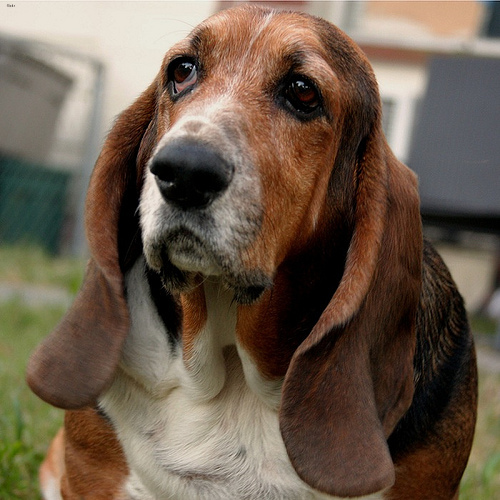

In [17]:
img = Image.open('../data/basset_hound_53.jpg')
img

Gráficos do matplotlib se comportam de uma forma diferente. A função display() é chamada automaticamente para todas as figuras criadas durante a execução de uma célula

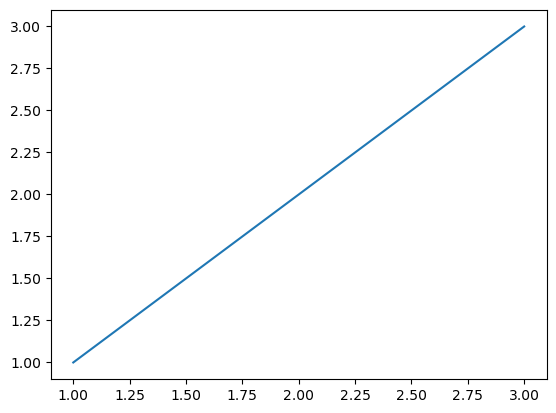

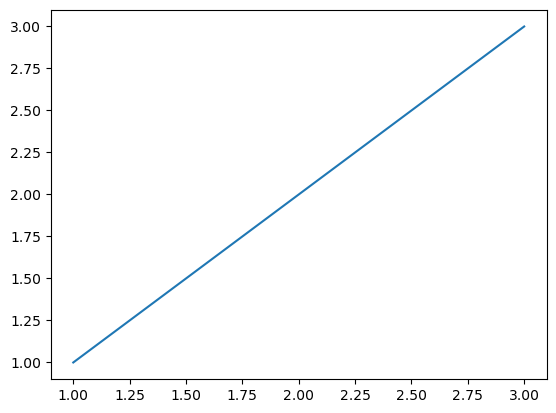

In [18]:
# Esta célula mostrará a mesma figura duas vezes, uma vez por causa do comando 
# `plt.subplots()` e outra porque a variável `fig` é a última linha da célula
fig, ax = plt.subplots()
ax.plot([1,2,3], [1,2,3])
fig

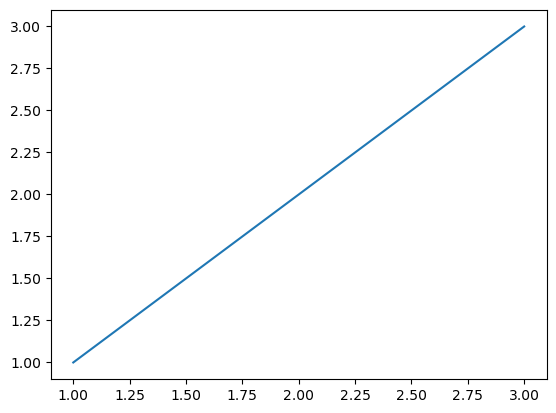

In [19]:
fig, ax = plt.subplots()
ax.plot([1,2,3], [1,2,3])
# A função close() evita que a figura seja mostrada automaticamente
plt.close()
fig

'Um texto'

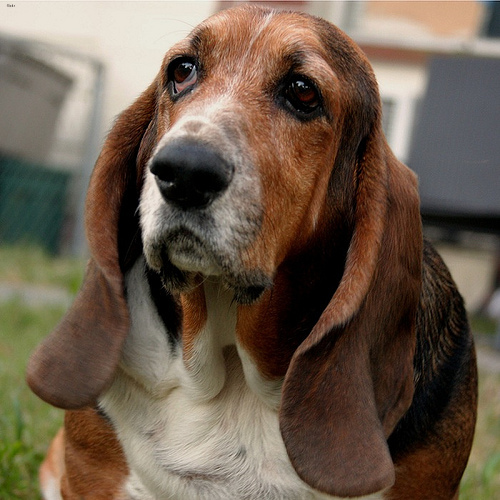

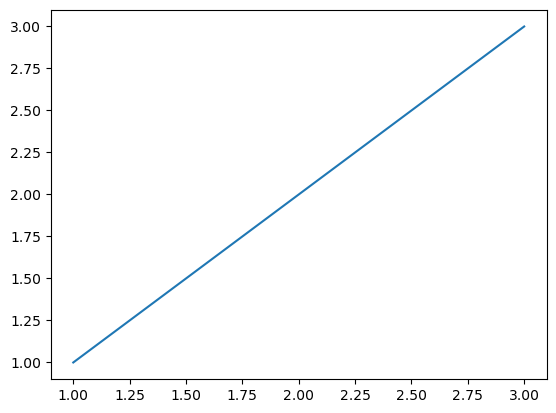

In [20]:
display.display(text, img, fig)

Uma forma simples de mostrar um plot ao longo da execução de uma célula:

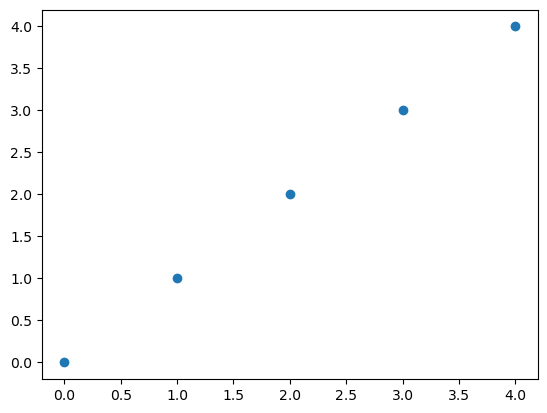

In [22]:
x = []
for i in range(5):
    x.append(i)
    fig, ax = plt.subplots()
    ax.scatter(x,x)
    # Remove a saída atual da célula, mas antes de remover espera o novo dado
    # a ser mostrado
    display.clear_output(wait=True)
    # Equivalente a chamar a função display(), mas evita problemas do plot
    # ser mostrado duas vezes
    plt.show()  